# Problem Statement

## Find 5 interesting insights from the data given. You can write the insights on a new google spreadsheet.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from langdetect import detect

In [2]:
df=pd.read_excel('Data Analyst - Test Data.xlsx')
pd.set_option('display.max_colwidth', None)
df.head(20)

,Review,date,Location
0,"I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n \n Read more\n Read less",2019-08-20,Sebastian
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok\n \n Read more\n Read less,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on my last three trips to New York.\n \n Read more\n Read less,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.\n \n Read more\n Read less,2019-08-20,NaN
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff\n \n Read more\n Read less",2019-08-19,Palm Harbor
5,All the options for fun were great! Do wish there were a better policy on the lazy river floats. Lots of people\n Hoarding them.\n \n Read more\n Read less,2019-08-19,NaN
6,Old. Musty. Motel. \n Bath need an update asap\n !!!!!!\n \n Read more\n Read less,2019-08-19,NaN
7,Loved the layout of the hotel and the relaxing pool area.\n Only con was housekeeping/maintenance staff passing the room with carts and speaking loudly on radios at 7-7:30 am.\n \n Read more\n Read less,2019-08-19,NaN
8,My wife and I loved everything about it. It’s close to everything and everywhere. \n We will be recommending to others and we will definitely be back.\n \n Read more\n Read less,2019-08-19,NaN
9,"rooms were very small, was told i had a complimentary upgrade to a empire state building view room but it was a regular room, everything else was ok.\n \n Read more\n Read less",2019-08-19,NaN


In [4]:
df.shape

(6448, 3)

In [5]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

In [6]:
df=df[df['Review'].isnull()==False]   #Remove rows where Review is null

In [7]:
df.isnull().sum()

Review         0
date           0
Location    4688
dtype: int64

In [8]:
df.dtypes   #datatype of each column

Review              object
date        datetime64[ns]
Location            object
dtype: object

### Check number of reviews per month

In [13]:
month_count=df[['date']].groupby(df.date.dt.to_period("M")).agg('count')  #Group wvwry month REview count

In [14]:
month_count

,date
date,
2018-08,433
2018-09,478
2018-10,520
2018-11,515
2018-12,626
2019-01,504
2019-02,412
2019-03,603
2019-04,583


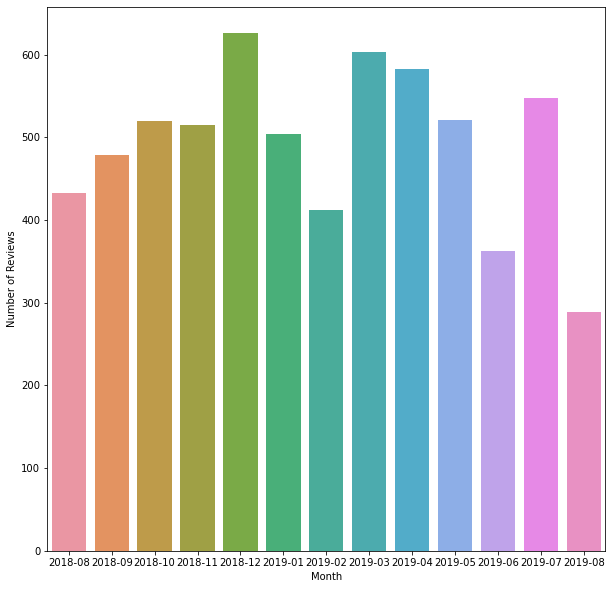

In [17]:
#Plotting a bargraph of months vs Review count
plt.figure(figsize=(10,10))
sns.barplot(x=month_count.index,y=month_count['date'],data=month_count)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

OBSERVATIONS
1) Highest customer engagement in december month (makes sense because of year end).
2) Lowest customer engagement in aug 19
3) There is also a good engagement march and april 18

## Top 10 locations with highest Review

In [18]:
loc_count=df['Location'].groupby(df.Location).agg('count')  #Group location with respect to Review count

In [19]:
loc_count

Location
2186                                           1
Aalborg, Denmark                               1
Abbotsford BC                                  1
Agde                                           1
Aguadilla, P.R.                                1
                                              ..
warwick ny                                     1
wyndham garden silicon valley ,san jose ca.    1
yakima wa                                      1
大阪                                             1
東京                                             2
Name: Location, Length: 1078, dtype: int64

In [24]:
loc=loc_count.sort_values(ascending=False).head(10)  #Get top 10 locations with highest reviews

In [25]:
loc

Location
United States of America    116
New York                     34
San Jose                     19
California                   19
Florida                      16
Canada                       16
United Kingdom               14
New York, NY                 13
NY                           12
Seattle                      12
Name: Location, dtype: int64

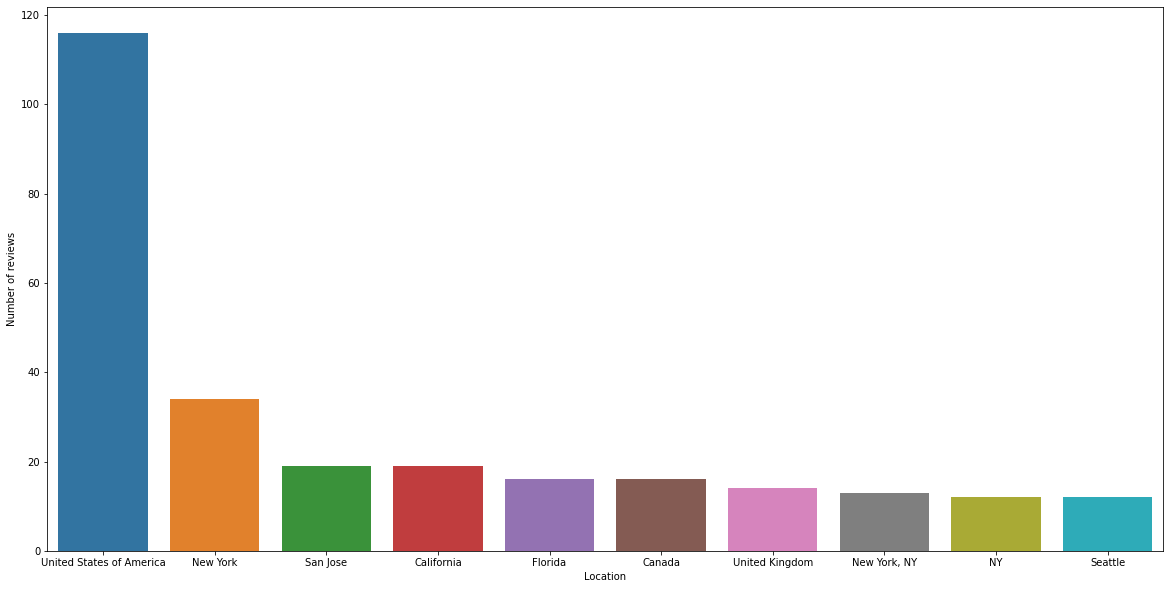

In [28]:
#Plotting bar graph of location vs no. of Reviews
X=loc.index
Y=loc.values
plt.figure(figsize=(20,10))
sns.barplot(x=X,y=Y)
plt.xlabel('Location')
plt.ylabel('Number of reviews')
plt.show()

INSIGHTS
Top 10 locations with highest reviews
USA Highest then NewYork,San jose and so on
NOTE: This is from the location information available

## Locations with lowest Reviews

In [173]:
loc_b=loc_count.sort_values(ascending=False).tail(500)

In [191]:
# Getting locations with reviews less then 10
l_count=[]
l_countries=[]
for i in range(1,11):
    print('Review count {} == {}'.format(i,loc_count[loc_count==i].count()))
    l_count.append(i)
    l_countries.append(loc_count[loc_count==i].count())

Review count 1 == 915
Review count 2 == 80
Review count 3 == 30
Review count 4 == 15
Review count 5 == 8
Review count 6 == 6
Review count 7 == 2
Review count 8 == 3
Review count 9 == 3
Review count 10 == 1


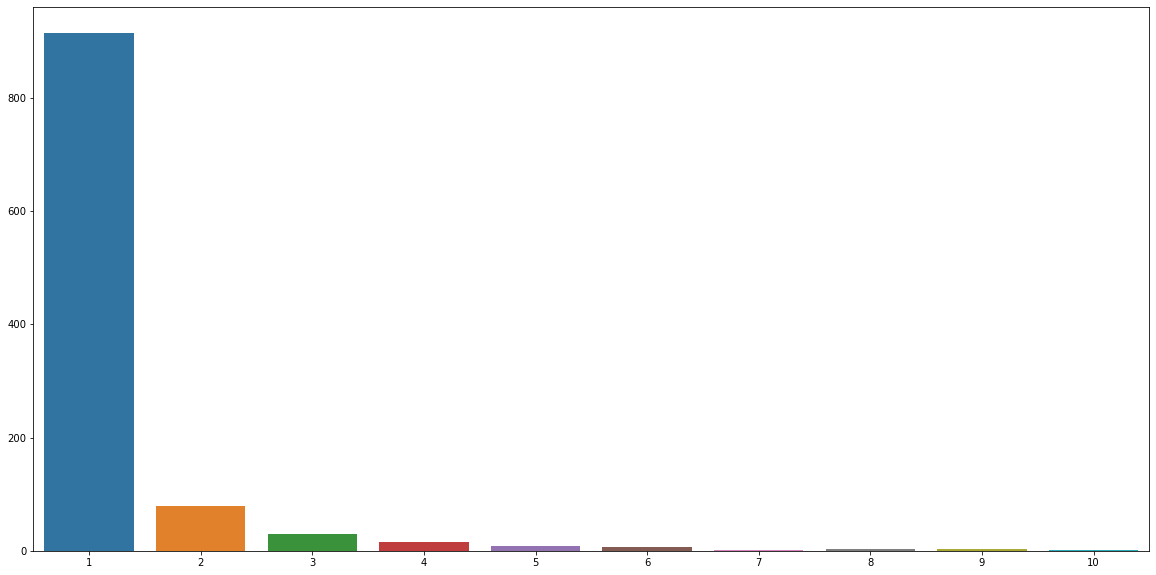

In [192]:
#Plotting Bar graph of No. of Reviews vs No. of Location
X=l_count
Y=l_countries
plt.figure(figsize=(20,10))
sns.barplot(x=X,y=Y)
plt.show()

In [194]:
sum(l_countries)  #Total locations with Reviews less than 10

1063

OBSERVATIONS

1)around 1063 locations the reviews are less than or equal to 10 from which the majority had only 1 review(915).

## Text Preprocessing

In [30]:
en=df.copy()

We can observe that the text in the dataset are of various languages.We need to filter the english text for further text processing

In [31]:
# Function to detect text language
def lang_detect(x):
    try:
        return detect(x)
    except:
        return 'not_detect'

In [32]:
en['Language']=en['Review'].apply(lang_detect)  # apply above function on Review column to detect language and show in Language column 

In [33]:
en.head()

,Review,date,Location,Language
0,"I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n \n Read more\n Read less",2019-08-20,Sebastian,en
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok\n \n Read more\n Read less,2019-08-20,Los Angeles,en
2,Great location! I have stayed at this hotel on my last three trips to New York.\n \n Read more\n Read less,2019-08-20,Georgia,en
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.\n \n Read more\n Read less,2019-08-20,NaN,en
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff\n \n Read more\n Read less",2019-08-19,Palm Harbor,en


In [34]:
en=en[en['Language']=='en']  #Filter out English Reviews

We can observe that there are various unwanted strings like '\n','Read less' and 'Read More' which has to be removed

In [35]:
# Function to remove unwanted Strings
def remove_uwanted(x):
    x=x.replace('\n', '')
    x=x.replace('Read more', '')
    x=x.replace('Read less', '')
    return x

In [36]:
en['Review']=en['Review'].apply(remove_uwanted)  #Apply above function on Review Column

In [37]:
en.head()

,Review,date,Location,Language
0,"I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!",2019-08-20,Sebastian,en
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,2019-08-20,Los Angeles,en
2,Great location! I have stayed at this hotel on my last three trips to New York.,2019-08-20,Georgia,en
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.,2019-08-20,NaN,en
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff",2019-08-19,Palm Harbor,en


## Getting Review lenght and Words per Review

In [38]:
en['Review length']=en['Review'].apply(lambda x : len(x))     #Geting Review Lenght
en['Words per Review']=en['Review'].apply(lambda x : len(x.split()))    #Getting number of words per review

In [39]:
en.head()

,Review,date,Location,Language,Review length,Words per Review
0,"I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!",2019-08-20,Sebastian,en,173,29
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,2019-08-20,Los Angeles,en,113,21
2,Great location! I have stayed at this hotel on my last three trips to New York.,2019-08-20,Georgia,en,85,16
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.,2019-08-20,NaN,en,426,80
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff",2019-08-19,Palm Harbor,en,105,16


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


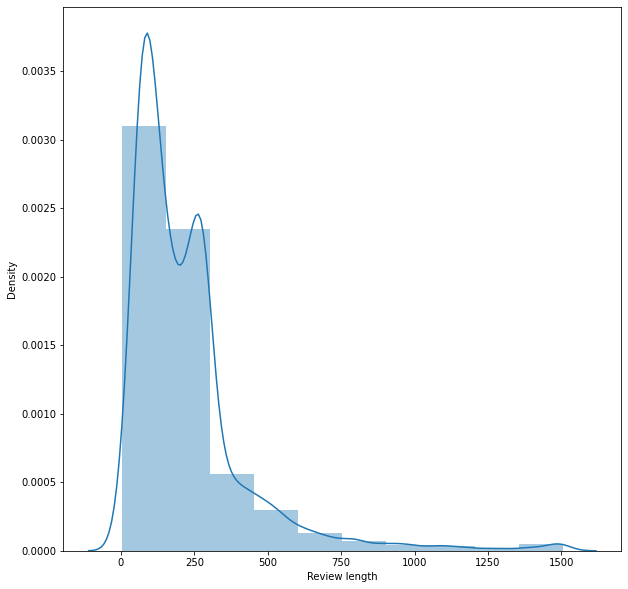

In [40]:
# Histogram showing Distribution of Review length 
plt.figure(figsize=(10,10))
sns.distplot(en['Review length'],bins=10,kde = True)
plt.show()

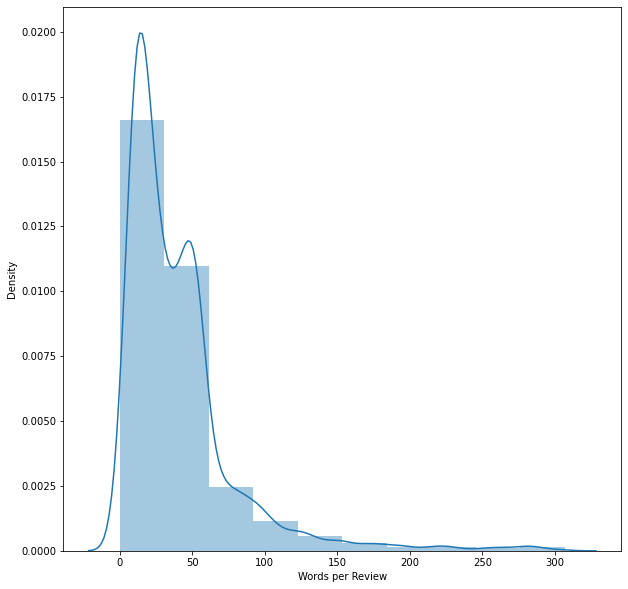

In [42]:
# Histogram showing Distribution of Words per Review 
plt.figure(figsize=(10,10))
sns.distplot(en['Words per Review'],bins=10,kde = True)
plt.show()

OBSERVATION

1)The majority of customer reviews are between 0 to 80 words.
2)There is somewhat strong engagement of customers.
3)There are few customer reviews with more than 100 words.Detailed Review

## Sentiment of the text using polarity

In [43]:
en['polarity']=en['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)  #Getting Sentiment of the text using polarity parameter

In [44]:
en.head()

,Review,date,Location,Language,Review length,Words per Review,polarity
0,"I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!",2019-08-20,Sebastian,en,173,29,0.514286
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,2019-08-20,Los Angeles,en,113,21,0.250000
2,Great location! I have stayed at this hotel on my last three trips to New York.,2019-08-20,Georgia,en,85,16,0.378788
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.,2019-08-20,NaN,en,426,80,0.102222
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff",2019-08-19,Palm Harbor,en,105,16,0.404524


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


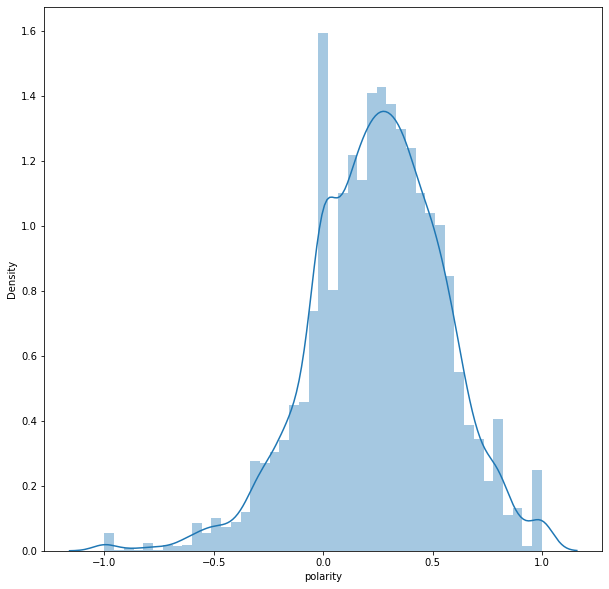

In [45]:
# Histogram showing the sentiment distribution
plt.figure(figsize=(10,10))
sns.distplot(en['polarity'],kde = True)
plt.show()

OBSERVATION

1)Majority of customers have neutral to positive sentiments
2)In very few cases the sentiments are negative

## DATA INSIGHT

### 1) There is lots of customer engagement by the year end.Other than that there is quite high engagement during March and April month.

### 2)Location was provided for only 26.5 % of Reviews

### 3) United States of America has Highest number of Reviews followed by New York and San Jose.Also there are 1063 locations with reviews less than 10 from which 915 locations were with single review.(Note that this observation is from from the limited location information given)

### 4) The Review length and words per Review distribution indicates that the majority of customers gave detailed reviews having more than 100 words which shows strong engagement.

### 5) The Sentiment analysis with  textblob show that for majority of Reviews , the polarity was above 0.So the sentiments were neutral to positive 